In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import re

In [17]:
# 未进行数据处理的源数据读入和处理
ori_data = pd.read_csv('spam.csv')

In [18]:
ori_data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
ori_data['v2'] = ori_data['v2'].apply(lambda x: x.split(' '))

0       [Go, until, jurong, point,, crazy.., Available...
1                    [Ok, lar..., Joking, wif, u, oni...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor..., U, c, already...
4       [Nah, I, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568       [Will, �_, b, going, to, esplanade, fr, home?]
5569    [Pity,, *, was, in, mood, for, that., So...any...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                    [Rofl., Its, true, to, its, name]
Name: v2, Length: 5572, dtype: object

In [8]:
list(ori_data['v2'].values)[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [24]:
# ori_data中的v2列做数据统计，主要包含下面几列
import os
import codecs
import math
import operator


def read(path):  # 读取txt文件，并返回list
    with open(path, encoding = "utf-8") as f:
        # data = pd.read_csv(f)  # 文件的读操作
        data = f.readlines()

    # f = open(path, 'rb')
    # data = []
    # for line in f.readlines():
    #     data.append(line)
    return data

def wry(txt, path):  # 写入txt文件
    with open(path, 'w') as f:
        f.write(txt)  # 文件的写操作

    # f = codecs.open(path, 'a')
    # f.write(txt)
    # f.close()
    return path


def toword(txtlis):  # 将文章按照‘ ’切割成词表，返回list
    wordlist = []
    alltxt = ''
    for i in txtlis:
        alltxt = alltxt+str(i)
    ridenter = alltxt.replace('\n', '')
    wordlist = ridenter.split(' ')
    return wordlist


def getstopword(path):  # 获取停用词表
    swlis = []
    for i in read(path):
        outsw = str(i).replace('\n', '')
        swlis.append(outsw)
    return swlis


def getridofsw(lis, swlist):  # 去除文章中的停用词
    afterswlis = []
    for i in lis:
        if str(i) in swlist:
            continue
        else:
            afterswlis.append(str(i))
    return afterswlis


def freqword(wordlis):  # 统计词频，并返回字典
    freword = {}
    for i in wordlis:
        if str(i) in freword:
            count = freword[str(i)]
            freword[str(i)] = count+1
        else:
            freword[str(i)] = 1
    return freword


def corpus(filelist, swlist):  # 建立语料库
    alllist = []
    for i in filelist:
        afterswlis = getridofsw(str(i), swlist)
        alllist.append(afterswlis)
    return alllist


def wordinfilecount(word, corpuslist):  # 查出包含该词的文档数
    count = 0  # 计数器
    for i in corpuslist:
        for j in i:
            if word in set(j):  # 只要文档出现该词，这计数器加1，所以这里用集合
                count = count+1
            else:
                continue
    return count


def tf_idf(wordlis, filelist, corpuslist):  # 计算TF-IDF,并返回字典
    outdic = {}
    tf = 0
    idf = 0
    dic = freqword(wordlis)
    outlis = []
    for i in set(wordlis):
        tf = dic[str(i)]/len(wordlis)  # 计算TF：某个词在文章中出现的次数/文章总词数
        # 计算IDF：log(语料库的文档总数/(包含该词的文档数+1))
        idf = math.log(len(filelist)/(wordinfilecount(str(i), corpuslist)+1))
        tfidf = tf*idf  # 计算TF-IDF
        outdic[str(i)] = tfidf
    orderdic = sorted(outdic.items(), key=operator.itemgetter(
        1), reverse=True)  # 给字典排序
    return orderdic


def befwry(lis):  # 写入预处理，将list转为string
    outall = ''
    for i in lis:
        ech = str(i).replace("('", '').replace("',", '\t').replace(')', '')
        outall = outall+'\t'+ech+'\n'
    return outall


def main(data):
    
    swpath = r'stopwords.txt'#停用词表路径
    swlist = getstopword(swpath)  # 获取停用词表列表

    # path = r'..\bk'
    # data['v2'] = data['v2'].apply(lambda x: x.split(' ')) # 按照空格切分句子
    filelist = list(data['v2'].values)
    
    wrypath = r'TFIDF.txt'

    corpuslist = corpus(filelist, swlist)  # 建立语料库

    outall = ''
    num = 0
    for i in filelist:
        print(i)
        afterswlis = getridofsw(str(i), swlist)  # 获取每一篇已经去除停用的词表
        tfidfdic = tf_idf(afterswlis, filelist, corpuslist)  # 计算TF-IDF
        print(tfidfdic,'TF-IDF')
        title = num
        echout = str(title)+'\n'+befwry(tfidfdic)
        print(str(title)+' is ok!')
        outall = outall+echout
        num += 1
    print(wry(outall, wrypath)+' is ok!')

if __name__ == '__main__':
    main(ori_data)



['Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']
[('G', 0.020501877255896982), ('C', 0.015091851182336509), ('A', 0.01194338884290207), (']', -1.1698187910194705e-05), ('[', -1.1698187910194705e-05), ('.', -0.05952920610551988), (' ', -0.5537877046631133), (',', -0.5879848928288036), ("'", -1.4916361537132508)] TF-IDF


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [2]:
# Preparing dataset
cols = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report','word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'classified']
data = pd.read_csv('spambase_data', names=cols, header=None)
X = data.iloc[:, :-1]
y = data.classified

# Removing special characters from column names, else it creates a problem using various regression models
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [3]:
# Going through data tables to get a hang of the data
print('Data Table \n')
display(X)
print('\n\nTags Table')
display(y)

Data Table 



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78




Tags Table


0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: classified, Length: 4601, dtype: int64

In [4]:
# Counting number of Spam/Non-Spam samples in the database
data.groupby('classified').count()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
classified,,,,,,,,,,,,,,,,,,,,,
0,2788,2788,2788,2788,2788,2788,2788,2788,2788,2788,...,2788,2788,2788,2788,2788,2788,2788,2788,2788,2788
1,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,...,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813


In [5]:
# Splitting the data into training and testing subsets
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=0)

In [6]:
# Using MultinomialNB Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

predicted = mnb.predict(X_test)

score = accuracy_score(y_test, predicted)
print('Accuracy Score: \n', (100*score))

Accuracy Score: 
 80.95582910934105


A score of ~81% is not very bad.

Since we are working to classify Spam vs Non-Spam emails, it is crucial for us to avoid False-Positive classification, i.e., classifying a Non-Spam email as a Spam email. For this, we check distribution of our classification.


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       822
           1       0.77      0.75      0.76       559

    accuracy                           0.81      1381
   macro avg       0.80      0.80      0.80      1381
weighted avg       0.81      0.81      0.81      1381



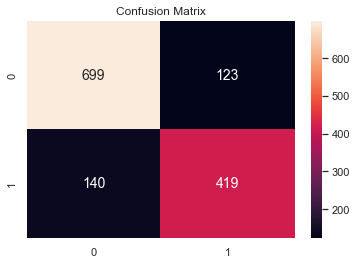

In [7]:
# Creating a confusion matrix and Classification Report. Output is in order of: True Positive, False Positive, False Negative and True Negative
import seaborn as sn
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr

cm1 = cm(y_test, predicted, labels=[0, 1])
df_cm = pd.DataFrame(cm1, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')

print('\nClassification Report: \n', cr(y_test, predicted))

Looks like we have about ~10% of False Positive Classification. This cannot be good.

Let us try better classification tools to pull this down.

In [8]:
# Using XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=120, leanring_rate=0.075)
xgb.fit(X_train, y_train)
#xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], verbose=False)

predicted1 = xgb.predict(X_test)

[13:24:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "leanring_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Accuracy Score on XGBoost: 
 94.6415640839971

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       822
           1       0.95      0.92      0.93       559

    accuracy                           0.95      1381
   macro avg       0.95      0.94      0.94      1381
weighted avg       0.95      0.95      0.95      1381



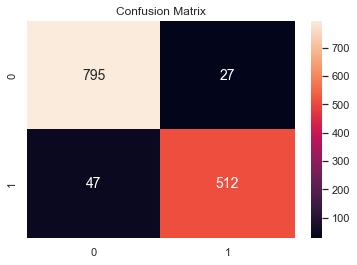

In [9]:
# Predicting when False Outcomes are Allowed for probabilities >0.5
score1 = accuracy_score(y_test, (predicted1 > 0.5))
print('Accuracy Score on XGBoost: \n', (100*score1))
cm2 = cm(y_test, predicted1 > 0.5, labels=[0, 1])
df_cm = pd.DataFrame(cm2, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
print('\nClassification Report: \n', cr(y_test, (predicted1 > 0.5)))

Using XGBoost Regressor, we have reduced False Positive classification to less than 3%.

Moreover, we have reduced all False classification to less than 6% increased accuracy to ~95%.

Although, it might not be acceptable to have 3% ham emails marked as spam. And to solve for that, we'll now restrict any False Positive outcomes.

Accuracy Score on XGBoost: 
 87.97972483707458

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       822
           1       0.99      0.71      0.83       559

    accuracy                           0.88      1381
   macro avg       0.91      0.85      0.87      1381
weighted avg       0.90      0.88      0.88      1381



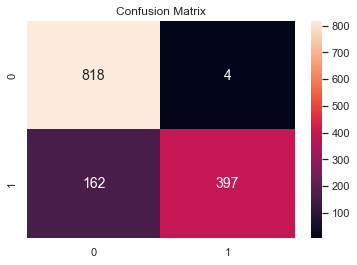

In [10]:
# Predicting when False Outcomes are Restricted for probabilities <0.9
score1 = accuracy_score(y_test, (predicted1 > 0.9))
print('Accuracy Score on XGBoost: \n', (100*score1))
cm2 = cm(y_test, predicted1 > 0.9, labels=[0, 1])
df_cm = pd.DataFrame(cm2, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Confusion Matrix')
print('\nClassification Report: \n', cr(y_test, (predicted1 > 0.9)))

We have reduced the accuracy of the model to less than 88% but we have managed to avoid hams being classified as spams.